In [13]:

import sys
sys.path.append("./wlevel_estimator/")

import openpifpaf
import torch
import numpy as np
import PIL
import matplotlib.pyplot as plt

from wlevel_estimator.detection.mask import detect_mask
from wlevel_estimator.detection.keypoint import detect_keypoint


pil_im = PIL.Image.open("./images/Flood_1409.jpg").convert('RGB')


max_length = max(pil_im.size[0],pil_im.size[1])
ratio = 512 / max_length
width = int(pil_im.size[0] * ratio)
height = int(pil_im.size[1] * ratio)
dim = (width, height)
# pil_im = pil_im.resize(dim)

im = np.asarray(pil_im)

# cars,image = detect_mask("./configs/quick_schedules/mask_rcnn_R_50_FPN_inference_acc_test.yaml",im)
# detect_keypoint(cars,0.2,False)

# cars = [car for car in cars if car.valid]
# network.Factory.checkpoint = 'shufflenetv2k16-apollo-24'
# model_cpu, _ = network.Factory().factory(head_metas=head_metas)

# Keypoints = torch.classes.openpifpaf_decoder_utils.NMSKeypoints
# Keypoints.set_instance_threshold(0.1)
# Keypoints.set_keypoint_threshold(0.1)

CppCifCaf = torch.classes.openpifpaf_decoder.CifCaf
# CppCifCaf.set_force_complete(True)
CppCifCaf.set_keypoint_threshold(0.2)
# CppCifCaf.set_keypoint_threshold_rel(0.0)

predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-apollo-66')
predictions, gt_anns, image_meta = predictor.numpy_image(im)
# annotation_painter = openpifpaf.show.painters.KeypointPainter(show_box = True)
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)
# fig, ax = plt.subplots()
# plt.imshow(im)
# annotation_painter.annotation(ax, predictions[0])
# plt.show()

# car_amount = len(cars)

# plt.figure(figsize=(car_amount*4,car_amount*8))

# # for i,car in enumerate(cars):
# # ax = plt.subplot(car_amount,1,i+1)
# # annotation_painter.annotation(ax, car.predictions[0])
# image = car.np_image.copy()
# mask = car.mask.copy()
# # if hasattr(car,'keypoints'):
# for kpt,kpt_id in zip(car.keypoints,car.visable_id):
#     plt.scatter(int(kpt[0]),int(kpt[1]),c='coral', s=10)
#     plt.text(int(kpt[0]), int(kpt[1]), str(kpt_id),color = "ivory",fontsize=10)
# plt.imshow(image)
#     # plt.imshow(mask, cmap='jet', alpha=0.5)


# plt.show()

In [ ]:
keypoints = car.predictions[0].data.tolist()
        
visable_index = []
visable_keypoints_2D = []
for i in range(0,6):
    x = keypoints[i][0]
    y = keypoints[i][1]
    score = keypoints[i][2]
    if(score > 0.0):
        visable_index.append(i)
        visable_keypoints_2D.append([x,y])

In [ ]:
visable_index

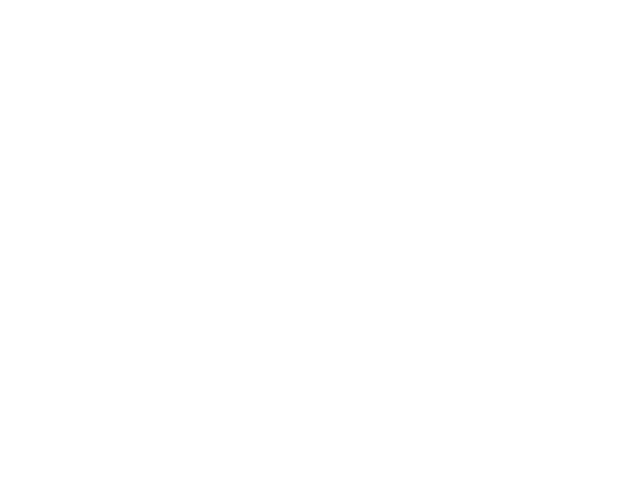

In [19]:

import openpifpaf
import torch
import numpy as np
import PIL
import matplotlib.pyplot as plt

pil_im = PIL.Image.open("./images/Flood_1409.jpg").convert('RGB')
im = np.asarray(pil_im)

predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-apollo-66')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)
# annotation_painter = openpifpaf.show.painters.KeypointPainter(show_box = True)

annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)
